In [ ]:
# !python -m spacy download en_core_web_sm
# run (or uncomment) ^ before starting work

## word2vec

In [15]:
from gensim.models import KeyedVectors

filename = "GoogleNews-vectors-negative300.bin"
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [21]:
result = model.most_similar(positive=["cat"], negative=["human"], topn=10)

print(result)

[('Yorkshire_terrier', 0.5180451273918152), ('Sheltie', 0.47817978262901306), ('Pomeranian', 0.4775863587856293), ('cats', 0.47607657313346863), ('Shih_Tzu', 0.4742986559867859), ('poodle', 0.46879899501800537), ('dog', 0.4651830196380615), ('kitten', 0.46405717730522156), ('shih_tzu', 0.4624621570110321), ('golden_retriever', 0.45923125743865967)]


In [24]:
result = model.most_similar(positive=["king", "woman"], negative=["man"], topn=10)

print(result)

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593831062317), ('monarchy', 0.5087411999702454)]


In [23]:
print(model.similarity("light", "dark"))
print(model.similarity("cheap", "expensive"))
print(model.similarity("door", "window"))
print(model.similarity("computer", "cat"))
print(model.similarity("red", "red"))

0.47133005
0.5366572
0.62127966
0.17324439
1.0


## movie reviews sentiment analysis

In [1]:
import pandas as pd

train_data = pd.read_csv("movie_reviews/train.tsv.zip", sep="\t", compression="zip")

test_data = pd.read_csv("movie_reviews/test.tsv.zip", sep="\t", compression="zip")

In [5]:
print(type(train_data))
print(train_data.shape)
print(train_data.info())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
(156060, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None
   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3         

In [6]:
print(type(test_data))
print(test_data.shape)
print(test_data.info())
print(test_data.head())

<class 'pandas.core.frame.DataFrame'>
(66292, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66292 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB
None
   PhraseId  SentenceId                                             Phrase
0    156061        8545  An intermittently pleasing but mostly routine ...
1    156062        8545  An intermittently pleasing but mostly routine ...
2    156063        8545                                                 An
3    156064        8545  intermittently pleasing but mostly routine effort
4    156065        8545         intermittently pleasing but mostly routine


In [11]:
print(train_data[train_data["PhraseId"] == 420])

     PhraseId  SentenceId  Phrase  Sentiment
419       420          15  better          4


2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


array([[<AxesSubplot:title={'center':'Sentiment'}>]], dtype=object)

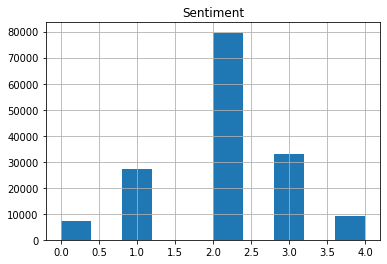

In [35]:
%matplotlib inline

print(train_data["Sentiment"].value_counts())
train_data.hist(column="Sentiment")